# Import Modules

In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
%run mpFunctions.py

# Import the Datasets

In [2]:
peopleFilepath = './Data/pickledPeople.pkl'
voteFilepath = './Data/pickledVotes_unpacked.pkl'
routeFilepath = './Data/pickledRoutes_unpacked.pkl'

people = pd.read_pickle(peopleFilepath)
votes = pd.read_pickle(voteFilepath)
routes = pd.read_pickle(routeFilepath)

# Isolate the variables to plot

In [3]:
def convertDiff(rating):
    ratings = ['5.0', '5.1', '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '5.10', '5.11', '5.12', '5.13', '5.14', '5.15']
    validRatings = {}
    count = 0
    for i in ratings:
        validRatings[i] = count
        count = count + 1
    if rating in validRatings:
        return validRatings[rating]
    else:
        return None
    
routes['diffRatingNumeric'] = [convertDiff(routes.iloc[i]['simpleDiffRating']) for i in range(len(routes))]
routes = routes[['avgQualityRating', 'simpleDiffRating', 'numQualityVotes', 'diffRatingNumeric']].dropna()
# reduceRatingsDF is defined/implemented in the mpFunction.py file
r1 = routes

# Create a Model with Both Features Included

In [4]:
# Constrain the size of the dataset
r2 = r1#[:5000]
r2 = r2.loc[r2['numQualityVotes'] >= 10]
print(len(r2))

# Collect the features in a 2D array 
X = r2[['diffRatingNumeric', 'numQualityVotes']]

# Add a constant to the array for the intecept 
X = sm.add_constant(X)

# Collect the response data in an array 
y = r2["avgQualityRating"]

# Fit the ordinary least-squares (OLS) model 
model = sm.OLS(y, X).fit()

# Get the predicted values from the model
yHat = model.predict()

# Print model parameteres
print(model.params)
print()
print(model.summary())

30688
const                1.083483
diffRatingNumeric    0.154117
numQualityVotes      0.002220
dtype: float64

                            OLS Regression Results                            
Dep. Variable:       avgQualityRating   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     4828.
Date:                Thu, 18 Apr 2019   Prob (F-statistic):               0.00
Time:                        13:09:19   Log-Likelihood:                -26045.
No. Observations:               30688   AIC:                         5.210e+04
Df Residuals:                   30685   BIC:                         5.212e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
------------

# Create a 3D Plot of the Data + Model

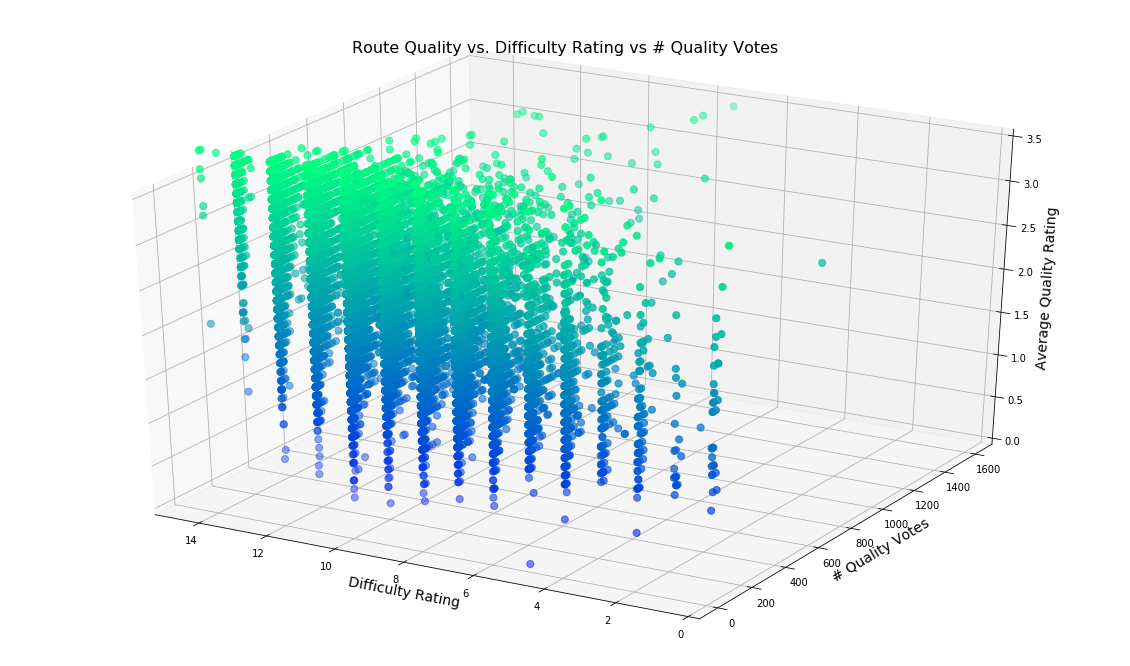

In [5]:
from mpl_toolkits.mplot3d import Axes3D

# model = sm.ols(formula='Sales ~ TV + Radio', data = csv)
# fit = model.fit()

# fit.summary()

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(15,0)
ax.set_zlim(0,3.5)
ax.scatter(r2['diffRatingNumeric'],
           r2['numQualityVotes'],
           r2['avgQualityRating'],
           cmap='winter',
           c=r2['avgQualityRating'],
           marker='o',
           s=50)

ax.set_title('Route Quality vs. Difficulty Rating vs # Quality Votes', fontsize=16)
ax.set_xlabel('Difficulty Rating', fontsize=14)
ax.set_ylabel('# Quality Votes', fontsize=14)
ax.set_zlabel('Average Quality Rating', fontsize=14)

plt.show()

# Investigate the individual SLRs

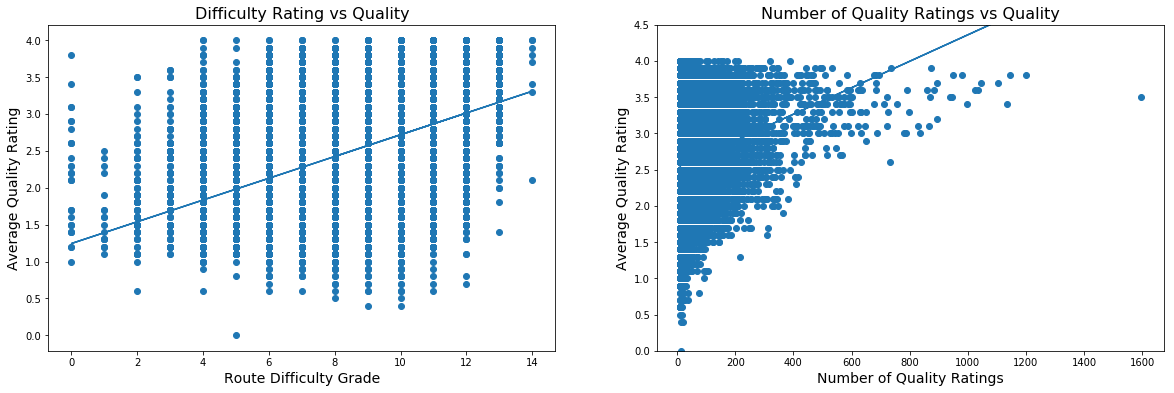

The SLR Equation for Difficulty Rating vs Quality is: y = 1.244 + 0.147x
The SLR Equation for Num Quality Ratings vs Quality is: y = 2.534 + 0.002x


In [6]:
# Store variables for ease of use
x0 = r2['diffRatingNumeric']
x1 = r2['numQualityVotes']
y = r2['avgQualityRating']

# SLR for Difficulty Rating
beta0, alpha0, r0, p0, stderr0 = stats.linregress(x0, y)
yHat0 = alpha0 + beta0*x0

#SLR for Num Quality Votes
beta1, alpha1, r1, p1, stderr1 = stats.linregress(x1, y)
yHat1 = alpha1 + beta1*x1

# Create the plot structure
figs, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax0 = axs[0]
ax1 = axs[1]

# Plot Difficulty Rating vs Quality
ax0.scatter(x0, y)
ax0.plot(x0, yHat0)
ax0.set_title("Difficulty Rating vs Quality", fontsize=16)
ax0.set_xlabel("Route Difficulty Grade", fontsize=14)
ax0.set_ylabel("Average Quality Rating", fontsize=14)

# Plot Num Quality Votes vs Quality
ax1.scatter(x1, y)
ax1.plot(x1, yHat1)
ax1.set_title("Number of Quality Ratings vs Quality", fontsize=16)
ax1.set_xlabel("Number of Quality Ratings", fontsize=14)
ax1.set_ylabel("Average Quality Rating", fontsize=14)
ax1.set_ylim(0,4.5)

plt.show()

print("The SLR Equation for Difficulty Rating vs Quality is: y = {:.3f} + {:.3f}x".format(alpha0, beta0))
print("The SLR Equation for Num Quality Ratings vs Quality is: y = {:.3f} + {:.3f}x".format(alpha1, beta1))


## Average Values for each Difficulty Rating and Number of Quality Ratings => redo analyses

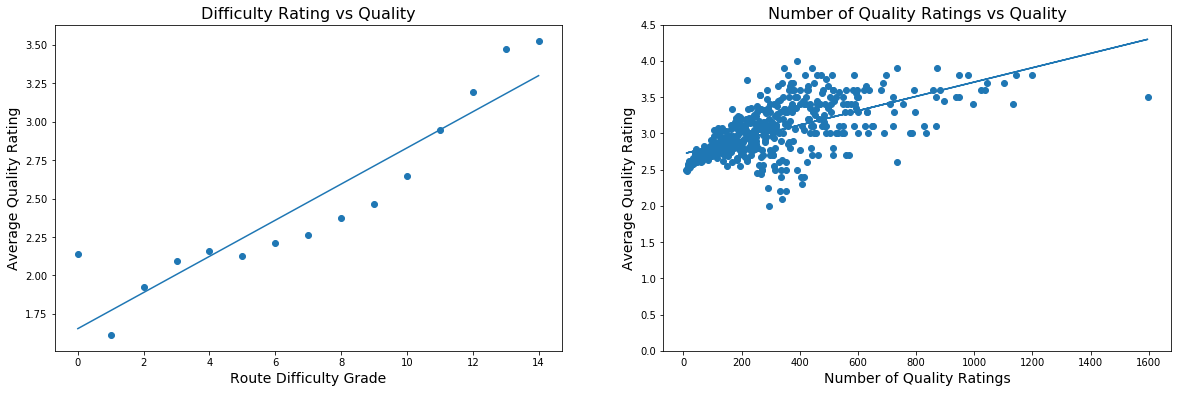

The SLR Equation for Difficulty Rating vs Quality is: y = 1.654 + 0.117x
The SLR Equation for Num Quality Ratings vs Quality is: y = 2.719 + 0.001x


In [7]:
r3 = avg_quality_by_grade(r2)
r4 = avg_quality_by_votes(r2)

# Store variables for ease of use
x0 = list(r3.keys())
y0_temp = list(r3.values())
y0 = []
for i in range(len(y0_temp)):
    y0.append(y0_temp[i][1])
x0 = x0[:len(x0)-1]
y0 = y0[:len(y0)-1]

x1 = list(r4.keys())
y1_temp = list(r4.values())
y1 = []
for i in range(len(y1_temp)):
    y1.append(y1_temp[i][1])

# SLR for Difficulty Rating

beta0, alpha0, r0, p0, stderr0 = stats.linregress(x0, y0)
yHat0 = alpha0 + list(map(lambda x: x*beta0, x0))

#SLR for Num Quality Votes
beta1, alpha1, r1, p1, stderr1 = stats.linregress(x1, y1)
yHat1 = alpha1 + list(map(lambda x: x*beta1, x1))

# Create the plot structure
figs, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax0 = axs[0]
ax1 = axs[1]

# Plot Difficulty Rating vs Quality
ax0.scatter(x0, y0)
ax0.plot(x0, yHat0)
ax0.set_title("Difficulty Rating vs Quality", fontsize=16)
ax0.set_xlabel("Route Difficulty Grade", fontsize=14)
ax0.set_ylabel("Average Quality Rating", fontsize=14)

# Plot Num Quality Votes vs Quality
ax1.scatter(x1, y1)
ax1.plot(x1, yHat1)
ax1.set_title("Number of Quality Ratings vs Quality", fontsize=16)
ax1.set_xlabel("Number of Quality Ratings", fontsize=14)
ax1.set_ylabel("Average Quality Rating", fontsize=14)
ax1.set_ylim(0,4.5)

plt.show()

print("The SLR Equation for Difficulty Rating vs Quality is: y = {:.3f} + {:.3f}x".format(alpha0, beta0))
print("The SLR Equation for Num Quality Ratings vs Quality is: y = {:.3f} + {:.3f}x".format(alpha1, beta1))

## Calculating R^2 for both parameters

In [8]:
SSE_diff = sum((y0-yHat0)**2)
SST_diff = sum((y0-np.mean(y0))**2)
r2_diff = 1 - (SSE_diff/SST_diff)
print("The R^2 value for the Difficulty vs Quality Model is: {:.3f}".format(r2_diff))

SSE_votes = sum((y1-yHat1)**2)
SST_votes = sum((y1-np.mean(y1))**2)
r2_votes = 1 - (SSE_votes/SST_votes)
print("The R^2 value for the Difficulty vs Quality Model is: {:.3f}".format(r2_votes))


The R^2 value for the Difficulty vs Quality Model is: 0.856
The R^2 value for the Difficulty vs Quality Model is: 0.398
